In [56]:
import pandas as pd

# Reading in sleep, workout, and physiological data
sleeps = pd.read_excel("C:/Users/Chris/Downloads/sleeps.xlsx")
print(sleep.head(5))

workouts = pd.read_excel("C:/Users/Chris/Downloads/workouts.xlsx")
print(workouts.head(5))

physio = pd.read_excel("C:/Users/Chris/Downloads/physio.xlsx")
print(physio.head(5))


     Cycle start time      Cycle end time Cycle timezone         Sleep onset  \
0 2024-09-16 01:01:47                 NaT      UTC-04:00 2024-09-16 01:01:47   
1 2024-09-15 02:06:38 2024-09-16 01:01:47      UTC-04:00 2024-09-15 02:06:38   
2 2024-09-13 23:36:59 2024-09-15 02:06:38      UTC-04:00 2024-09-14 06:06:27   
3 2024-09-13 00:44:50 2024-09-13 23:36:59      UTC-04:00 2024-09-13 00:44:50   
4 2024-09-11 23:36:59 2024-09-13 00:44:50      UTC-04:00 2024-09-11 23:36:59   

           Wake onset  Sleep performance %  Respiratory rate (rpm)  \
0 2024-09-16 09:22:08                   76                    15.5   
1 2024-09-15 09:43:44                   77                    17.5   
2 2024-09-14 08:22:00                   19                    16.7   
3 2024-09-13 07:32:26                   60                    15.5   
4 2024-09-12 09:53:40                   83                    15.5   

   Asleep duration (min)  In bed duration (min)  Light sleep duration (min)  \
0                  

In [57]:
# Ensure correct datetime parsing
sleeps['Cycle start time'] = pd.to_datetime(sleeps['Cycle start time'], errors='coerce')

# Checking for column name issues
print(sleeps.columns)

# Initializing the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Sleep Performance Dashboard"),

    # Date filter
    dcc.DatePickerRange(
        id='date-picker',
        min_date_allowed=sleeps['Cycle start time'].min(),
        max_date_allowed=sleeps['Cycle start time'].max(),
        start_date=sleeps['Cycle start time'].min(),
        end_date=sleeps['Cycle start time'].max()
    ),

    # Bar chart
    dcc.Graph(id='sleep-performance-bar')
])

# Callback to update the chart
@app.callback(
    Output('sleep-performance-bar', 'figure'),
    Input('date-picker', 'start_date'),
    Input('date-picker', 'end_date')
)
def update_bar_chart(start_date, end_date):
    try:
        # Filter data based on dates
        filtered_data = sleeps[
            (sleeps['Cycle start time'] >= start_date) &
            (sleeps['Cycle start time'] <= end_date)
        ]

        # Handling empty data
        if filtered_data.empty:
            return px.bar(title="No Data Available for Selected Dates")

        # Creating bar chart
        fig = px.bar(
            filtered_data,
            x='Cycle start time',
            y='Sleep performance %',
            title='Sleep Performance % Over Time'
        )
        return fig

    except Exception as e:
        print(f"Error: {e}")
        return px.bar(title="An error occurred. Check console for details.")

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone', 'Sleep onset',
       'Wake onset', 'Sleep performance %', 'Respiratory rate (rpm)',
       'Asleep duration (min)', 'In bed duration (min)',
       'Light sleep duration (min)', 'Deep (SWS) duration (min)',
       'REM duration (min)', 'Awake duration (min)', 'Sleep need (min)',
       'Sleep debt (min)', 'Sleep efficiency %', 'Sleep consistency %', 'Nap'],
      dtype='object')


In [59]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Recovery Score Dashboard"),
    
    # Date range picker for filtering
    dcc.DatePickerRange(
        id='date-picker',
        min_date_allowed=physio['Cycle start time'].min(),
        max_date_allowed=physio['Cycle start time'].max(),
        start_date=physio['Cycle start time'].min(),
        end_date=physio['Cycle start time'].max()
    ),
    
    # Bar chart to display recovery scores
    dcc.Graph(id='recovery-score-bar')
])

# Callback to update the bar chart based on selected dates
@app.callback(
    Output('recovery-score-bar', 'figure'),
    Input('date-picker', 'start_date'),
    Input('date-picker', 'end_date')
)
def update_bar_chart(start_date, end_date):
    # Filter the data based on selected dates
    filtered_data = physio[
        (physio['Cycle start time'] >= start_date) &
        (physio['Cycle start time'] <= end_date)
    ]
    
    # Create the bar chart
    fig = px.bar(
        filtered_data, 
        x='Cycle start time', 
        y='Recovery score %', 
        title='Recovery Score % Over Time'
    )
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

In [60]:
# Ensure the date column is in datetime format
physio['Cycle start time'] = pd.to_datetime(physio['Cycle start time'], errors='coerce')

# Check if the column names are correct
print(physio.columns)

# Initializing the Dash app
app = dash.Dash(__name__)

# Layout of dashboard
app.layout = html.Div([
    html.H1("Day Strain Dashboard"),

    # Date filter
    dcc.DatePickerRange(
        id='date-picker',
        min_date_allowed=physio['Cycle start time'].min(),
        max_date_allowed=physio['Cycle start time'].max(),
        start_date=physio['Cycle start time'].min(),
        end_date=physio['Cycle start time'].max()
    ),

    # Bar chart to display day strain
    dcc.Graph(id='strain-bar')
])

# Callback to update the bar chart based on selected dates
@app.callback(
    Output('strain-bar', 'figure'),
    Input('date-picker', 'start_date'),
    Input('date-picker', 'end_date')
)
def update_bar_chart(start_date, end_date):
    try:
        # Filter the data based on the selected date range
        filtered_data = physio[
            (physio['Cycle start time'] >= start_date) &
            (physio['Cycle start time'] <= end_date)
        ]

        # Handling empty data
        if filtered_data.empty:
            return px.bar(title="No Data Available for Selected Dates")

        # Create the bar chart for day strain
        fig = px.bar(
            filtered_data,
            x='Cycle start time',
            y='Day Strain',
            title='Day Strain Over Time'
        )
        return fig

    except Exception as e:
        print(f"Error: {e}")
        return px.bar(title="An error occurred. Check console for details.")

# Run Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %', 'Sleep consistency %'],
      dtype='object')


# --------------------------------------------------------------------------------------

In [61]:
# Parse 'Cycle start time' as datetime
physio['Cycle start time'] = pd.to_datetime(physio['Cycle start time'], errors='coerce')

# Filter data for 2024 only
physio_2024 = physio[physio['Cycle start time'].dt.year == 2024]

# Total calories burned in 2024
total_calories_2024 = physio_2024['Energy burned (cal)'].sum()

# Average strain per day in 2024
daily_strain = physio_2024.groupby(physio_2024['Cycle start time'].dt.date)['Day Strain'].mean()
average_strain_per_day = daily_strain.mean()

print(f"Total Calories Burned in 2024 so far: {total_calories_2024} cal")
print(f"Average Strain per Day in 2024: {average_strain_per_day:.2f}")


Total Calories Burned in 2024 so far: 801943.0 cal
Average Strain per Day in 2024: 12.12


In [62]:
unique_days = 259

# Average calories burned per day (only days with entries)
average_calories_per_day = total_calories_2024 / unique_days 

print(f"Average Calories Burned per Day in 2024: {average_calories_per_day:.2f} cal")

Average Calories Burned per Day in 2024: 3096.31 cal


# ---------------------------------------------------------------------------------------

In [66]:
# Drop rows with missing values in both features and original data
merged_data_clean = merged_data.dropna(subset=['Sleep performance %_x', 'Recovery score %', 
                                               'Day Strain', 'Energy burned (cal)_y',
                                               'HR Zone 1 %', 'HR Zone 2 %', 
                                               'HR Zone 3 %', 'HR Zone 4 %', 'HR Zone 5 %'])

# Select features from the cleaned data
features = merged_data_clean[['Sleep performance %_x', 'Recovery score %', 
                              'Day Strain', 'Energy burned (cal)_y',
                              'HR Zone 1 %', 'HR Zone 2 %', 'HR Zone 3 %', 
                              'HR Zone 4 %', 'HR Zone 5 %']]


In [67]:
print(f"Length of features: {len(features)}")
print(f"Length of merged_data_clean: {len(merged_data_clean)}")


Length of features: 456
Length of merged_data_clean: 456


In [69]:
# Make a copy of the cleaned DataFrame to avoid warnings
merged_data_clean = merged_data_clean.copy()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data_clean['Cluster'] = kmeans.fit_predict(scaled_features)


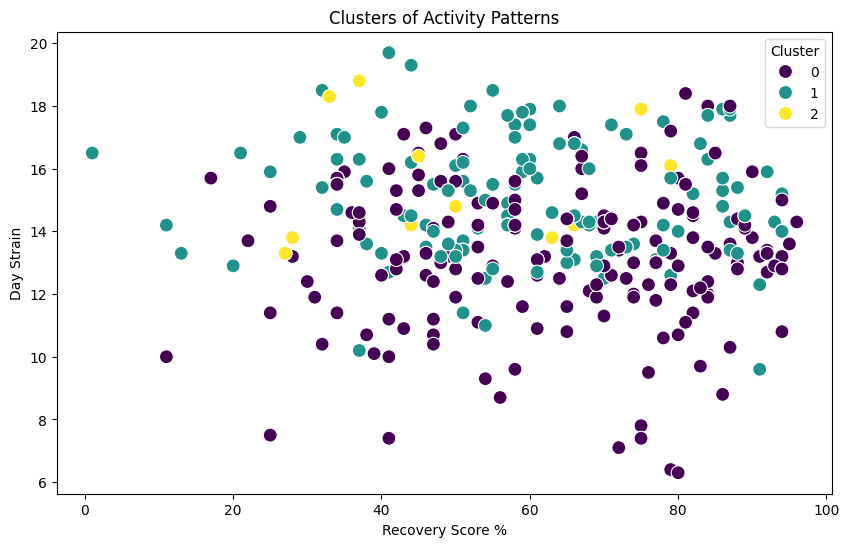

Cluster Summary:
         Sleep performance %_x  Respiratory rate (rpm)_x  \
Cluster                                                    
0                    67.660305                 15.614885   
1                    66.177778                 15.777222   
2                    61.857143                 15.507143   

         Asleep duration (min)_x  In bed duration (min)_x  \
Cluster                                                     
0                     392.293893               451.148855   
1                     378.377778               431.883333   
2                     363.642857               421.500000   

         Light sleep duration (min)_x  Deep (SWS) duration (min)_x  \
Cluster                                                              
0                          223.496183                    83.011450   
1                          220.711111                    77.383333   
2                          214.142857                    73.071429   

         REM duration (mi

In [70]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_clean, x='Recovery score %', y='Day Strain', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Activity Patterns')
plt.xlabel('Recovery Score %')
plt.ylabel('Day Strain')
plt.legend(title='Cluster', loc='best')
plt.show()

# Group by 'Cluster' and calculate the mean only for numeric columns
cluster_summary = merged_data_clean.groupby('Cluster').mean(numeric_only=True)

print("Cluster Summary:")
print(cluster_summary)


In [71]:
# Display the summary directly as a table in Jupyter Notebook
import IPython.display as display
display.display(cluster_summary)

,Sleep performance %_x,Respiratory rate (rpm)_x,Asleep duration (min)_x,In bed duration (min)_x,Light sleep duration (min)_x,Deep (SWS) duration (min)_x,REM duration (min)_x,Awake duration (min)_x,Sleep need (min)_x,Sleep debt (min)_x,...,Average HR (bpm)_y,HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,67.660305,15.614885,392.293893,451.148855,223.496183,83.011450,85.786260,58.854962,582.347328,97.240458,...,103.480916,49.595420,28.225191,5.908397,0.500000,0.000000,0.167939,1143.458667,66.690444,1.059111
1,66.177778,15.777222,378.377778,431.883333,220.711111,77.383333,80.283333,53.505556,574.994444,94.594444,...,119.794444,20.266667,45.383333,27.655556,4.000000,0.083333,0.133333,1186.165000,54.465417,-0.319583
2,61.857143,15.507143,363.642857,421.500000,214.142857,73.071429,76.428571,57.857143,590.285714,94.357143,...,145.500000,4.571429,8.428571,26.285714,53.142857,6.785714,0.214286,1214.060000,52.450000,0.543333


## Cluster 0: Balanced/Recovery Days

### Key Characteristics:

Sleep Performance: 67.66%

Recovery Score: 66.18%

Day Strain: 15.61

REM Sleep: 85.78 minutes

SWS (Deep Sleep): 83.01 minutes

Average HR: 103.48 bpm


### Interpretation:

This cluster likely represents recovery days, where sleep metrics (REM and deep sleep) are well-balanced, and strain is moderate. These days provide optimal recovery while maintaining some physical activity.

### Actionable Insight:

Replicate more days like these to promote recovery and prevent burnout. Use these days before or after intense workouts to maintain peak performance.

## Cluster 1: High Activity Days

### Key Characteristics:

Sleep Performance: 66.18%

Recovery Score: 66.18%

Day Strain: 15.77

REM Sleep: 80.28 minutes

SWS (Deep Sleep): 77.38 minutes

Average HR: 119.79 bpm

### Interpretation:

This cluster reflects intense workout days, with higher heart rate and moderate strain. There is a slight reduction in sleep quality (lower REM and deep sleep), indicating that these days place more stress on your body.

### Actionable Insight:

Monitor recovery following these days to avoid overtraining. Ensure high activity days are followed by rest or recovery days (Cluster 0) to promote long-term progress.


## Cluster 2: Low Recovery / High Stress Days

### Key Characteristics:

Sleep Performance: 61.86%

Recovery Score: 57.86%

Day Strain: 15.50

REM Sleep: 76.43 minutes

SWS (Deep Sleep): 73.07 minutes

Average HR: 145.50 bpm

### Interpretation:

This cluster represents high-stress or fatigued days. The combination of poor sleep, high heart rate, and moderate strain suggests insufficient recovery. These days could reflect a need for deloading or rest.

### Actionable Insight:

Prioritize sleep and recovery on these days. Consider adjusting your training load or introducing more rest days if these patterns appear frequently.
